# Data Quality Monitor

In [1]:
'''
Load package. 

Try run this script in analysis directory.
'''

import uproot
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.fft import fft, fftfreq, rfft, rfftfreq
import os
import sys
import glob
from datetime import datetime
from numpy import array, isscalar, uint16, uint32
import pandas as pd
from iminuit import Minuit
from numpy import sqrt 
from scipy.stats import norm
import statistics
import uproot
import types
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# define constants
ADC_TO_MV=2000/(2**14-1)
SAMPLE_TO_NS = 2

In [3]:
"""
OPTIONAL:
    enable interactive plotting. It requires ipympl to be installed. Try: 
        pip install ipympl
    
    Alternative, if you have created a virtual enviroment suggested in README, try:
        source env/bin/activate
"""
#%matplotlib widget

'\nOPTIONAL:\n    enable interactive plotting. It requires ipympl to be installed. Try: \n        pip install ipympl\n    \n    Alternative, if you have created a virtual enviroment suggested in README, try:\n        source env/bin/activate\n'

## Look at the waveform of an individual event using EventDisplay

In [5]:
# import EventDisplay
import sys
sys.path.append("/home/guang/work/bnl1t/drop/drop_jan26_24_pull/drop/tools")

# define enviromental variables
%env SOURCE_DIR=../src
%env YAML_DIR=../yaml
from event_display import EventDisplay

# veiw waveform using EventDisplay
#dp = EventDisplay(fpath, '/home/guang/work/bnl1t/drop/drop_jan26_24_pull/drop/yaml/config_30t.yaml')

env: SOURCE_DIR=../src
env: YAML_DIR=../yaml


In [6]:
schn = [[]*i for i in range(97)]
h_hodo = [[]*i for i in range(4)]
ichn = 0
hevt = 0
print('starting')

NameError: name 'dp' is not defined

chg length  36
12   12   12
24   24   36
area values:   [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
area2 values:  [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]


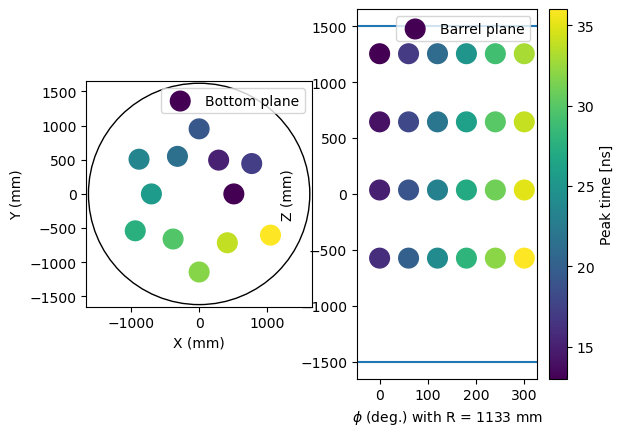

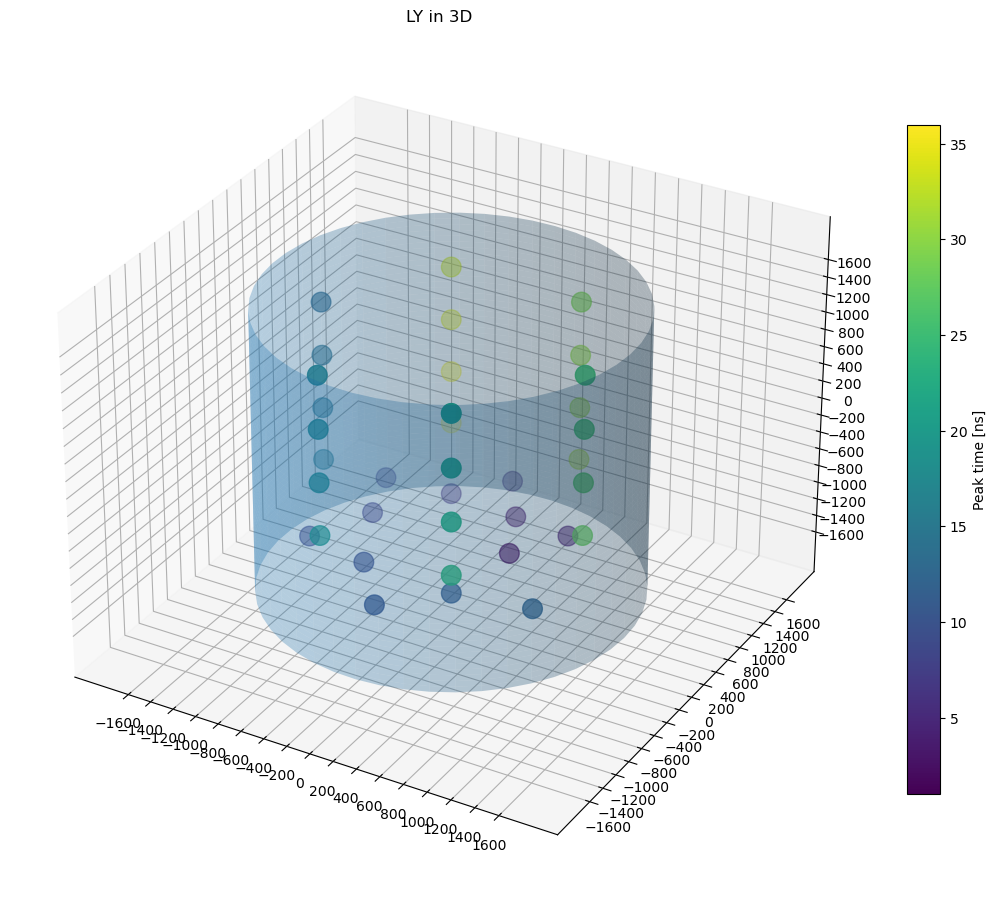

In [7]:
from sympy import plot_implicit
from sympy.abc import X, Y

event_start_time=-1
event_end_time=-1
# define path to your raw root file
#DATA_DIR='/home/guang/work/bnl1t/drop/src'
ch_string = ""
hodo_len = 20

for i in range(15):
    ch_string += "adc_b1_ch{} ".format(i+1)
for i in range(15):
    ch_string += "adc_b2_ch{} ".format(i)
    
#print (ch_string)    

#for word in ch_string.split():
#    print (word)
def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(-height_z, height_z, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

def display_charge(chg, hchg, atime, ievt, isavefig):
    dis_x=[]
    dis_y=[]
    area=[]
    area2=[]
    area3=[]
    colo=[]
    colo2=[]
    locx_bot = [508.000, 285.800, 769.900, 0.000, -317.500, -879.900, -698.500, -934.900, -381.000, 0.000, 412.800, 1044.900
               ]
    locy_bot = [0.000, 494.900, 444.500, 952.500, 549.900, 508.000, 0.000, -539.800, -659.900, -1143.000, -714.900, -603.300]
    locx_side= [-1133.5, -1133.5, -1133.5, -1133.5, -566.75, -566.75, -566.75, -566.75, 566.75, 566.75, 566.75, 566.75, 1133.5, 1133.5, 1133.5, 1133.5, 566.75, 566.75, 566.75, 566.75, -566.75, -566.75, -566.75, -566.75]
    locy_side= [0.0, 0.0, 0.0, 0.0, -981.64, -981.64, -981.64, -981.64, -981.64, -981.64, -981.64, -981.64, 0.0, 0.0, 0.0, 0.0, 981.64, 981.64, 981.64, 981.64, 981.64, 981.64, 981.64, 981.64]
    locz_side= [1254.35, 644.75, 35.15, -574.45, 1254.35, 644.75, 35.15, -574.45, 1254.35, 644.75, 35.15, -574.45, 1254.35, 644.75, 35.15, -574.45, 1254.35, 644.75, 35.15, -574.45, 1254.35, 644.75, 35.15, -574.45]

    locx_3d = [ 508.000, 285.800, 769.900, 0.000, -317.500, -879.900, -698.500, -934.900, -381.000, 0.000, 412.800, 1044.900,
              -1133.5, -1133.5, -1133.5, -1133.5, -566.75, -566.75, -566.75, -566.75, 566.75, 566.75, 566.75, 566.75, 1133.5, 1133.5, 1133.5, 1133.5, 566.75, 566.75, 566.75, 566.75, -566.75, -566.75, -566.75, -566.75]
    locy_3d = [0.000, 494.900, 444.500, 952.500, 549.900, 508.000, 0.000, -539.800, -659.900, -1143.000, -714.900, -603.300,
              0.0, 0.0, 0.0, 0.0, -981.64, -981.64, -981.64, -981.64, -981.64, -981.64, -981.64, -981.64, 0.0, 0.0, 0.0, 0.0, 981.64, 981.64, 981.64, 981.64, 981.64, 981.64, 981.64, 981.64]
    locz_3d = [ -1035.950, -1035.950, -1035.950, -1035.950, -1035.950, -1035.950, -1035.950, -1035.950, -1035.950, -1035.950, -1035.950, -1035.950,
              1254.35, 644.75, 35.15, -574.45, 1254.35, 644.75, 35.15, -574.45, 1254.35, 644.75, 35.15, -574.45, 1254.35, 644.75, 35.15, -574.45, 1254.35, 644.75, 35.15, -574.45, 1254.35, 644.75, 35.15, -574.45]

    fig, (ax1, ax2) = plt.subplots(1, 2)
    plt.rcParams['figure.figsize'] = [16, 4]
    print ('chg length ',len(chg))
    for i in range(len(chg)):
        if i < 12:
            area.append(chg[i]*50)
            area3.append(chg[i]*50)
            colo.append(atime[i])
        elif i < 20+16:
            if i>11 and i<16:
                dis_x.append(0)
            if i>15 and i<20:
                dis_x.append(60)
            if i>19 and i<24:
                dis_x.append(120)
            if i>23 and i<28:
                dis_x.append(180)
            if i>27 and i<32:
                dis_x.append(240)
            if i>31 and i< 36:
                dis_x.append(300)
            dis_y.append(locz_side[i-12])
            area2.append(chg[i]*50)
            area3.append(chg[i]*50)
            colo2.append(atime[i])
    print(len(locx_bot),' ',len(locy_bot),' ',len(area))
    print(len(dis_x),' ',len(dis_y),' ',len(area3))
    print('area values:  ',area)
    print('area2 values: ',area2)
    sc1 = ax1.scatter(locx_bot, locy_bot, s=area, c=colo, alpha=1, label="Bottom plane")
    #ax1.colorbar(sc1, label="Peak time [ns]")
    sc2 = ax2.scatter(dis_x, dis_y, s=area2, c=colo2, alpha=1, label="Barrel plane")
    plt.colorbar(sc2, label="Peak time [ns]")
    ax1.set_xlabel("X (mm)")
    ax1.set_ylabel("Y (mm)")
    ax2.set_xlabel("$\phi$ (deg.) with R = 1133 mm")
    ax2.set_ylabel("Z (mm)")
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right')

    Drawing_uncolored_circle = plt.Circle( (0, 0 ),
                                          1620 ,
                                          fill = False )
     
    ax1.set_aspect( 1 )
    ax1.add_artist( Drawing_uncolored_circle )
    ax1.set_xlim(-1650,1650)
    ax1.set_ylim(-1650,1650)

    linepos = 1503
    plt.axline((-30, -linepos), (310, -linepos))
    plt.axline((-30, linepos), (310, linepos))
    if isavefig == True:
        plt.savefig('event_display_2d_{}.png'.format(ievt))
    plt.show()

    fig = plt.figure(figsize=(12,12))
    # syntax for 3-D projection
    #ax = Axes3D(fig)
    ax = plt.axes(projection ='3d')
     
    # defining axes
    z = np.linspace(0, 1, 100)
    x = z * np.sin(25 * z)
    y = z * np.cos(25 * z)
    c = x + y
    ax.set_xticks([-1600,-1400,-1200,-1000,-800,-600,-400,-200,0,200,400,600,800,1000,1200,1400,1600])
    ax.set_yticks([-1600,-1400,-1200,-1000,-800,-600,-400,-200,0,200,400,600,800,1000,1200,1400,1600])
    ax.set_zticks([-1600,-1400,-1200,-1000,-800,-600,-400,-200,0,200,400,600,800,1000,1200,1400,1600])
    ax.axes.set_xlim3d(left=-2000, right=2000) 
    ax.axes.set_ylim3d(bottom=-2000, top=2000) 
    ax.axes.set_zlim3d(bottom=-2000, top=2000) 
    sc3 = ax.scatter(locx_3d, locy_3d, locz_3d, s=area3, c = atime)
    Xc,Yc,Zc = data_for_cylinder_along_z(0,0,1503,1625)
    ax.plot_surface(Xc, Yc, Zc, alpha=0.3)
    plt.colorbar(sc3, label="Peak time [ns]", fraction=0.036, pad=0.04)

    #i1 = -1;
    #i2 = -1;
    #i3 = -1;
    #i4 = -1;
    #for i in range(8):
    #    if (chg[i] > 0.5):
    #        i1 = i
    #for i in range(8):
    #    if (chg[i+8] > 0.5):
    #        i2 = i
    #for i in range(8):
    #    if (chg[i+16] > 0.5):
    #        i3 = i
    #for i in range(8):
    #    if (chg[i+24] > 0.5):
    #        i4 = i
            
    #radius is 500.38 mm
    #VecStart_x = (620-500.38) + (7-i2)*hodo_len + hodo_len/2.;
    #VecStart_y = (500.38 - 490) + i1*hodo_len + hodo_len/2.;
    #VecStart_z = 941;
    #VecEnd_x = (500-500.38) + (7-i4)*hodo_len + hodo_len/2;
    #VecEnd_y = (500.38 - 400) + i3*hodo_len + hodo_len/2;
    #VecEnd_z = -941;
    #ax.plot([VecStart_x, VecEnd_x], [VecStart_y,VecEnd_y],[VecStart_z,VecEnd_z], 'r--', linewidth=3) 
     
    # syntax for plotting
    ax.set_title('LY in 3D')
    if isavefig == True:
        plt.savefig('event_display_3d_{}.png'.format(ievt))
    plt.show()

evt_chg = 36*[4]
hodo_chg = []
atime = []
for mm in range(36):
    atime.append(mm+1)
display_charge(evt_chg, hodo_chg, atime,-1, True)

<re.Match object; span=(83, 94), match='240708T1706'>
Index(['adc_b1_ch0', 'adc_b1_ch1', 'adc_b1_ch2', 'adc_b1_ch3', 'adc_b1_ch4',
       'adc_b1_ch5', 'adc_b1_ch6', 'adc_b1_ch7', 'adc_b1_ch8', 'adc_b1_ch9',
       'adc_b1_ch10', 'adc_b1_ch11', 'adc_b1_ch12', 'adc_b1_ch13',
       'adc_b1_ch14', 'adc_b1_ch15', 'adc_b2_ch0', 'adc_b2_ch1', 'adc_b2_ch2',
       'adc_b2_ch3', 'adc_b2_ch4', 'adc_b2_ch5', 'adc_b2_ch6', 'adc_b2_ch7',
       'adc_b2_ch8', 'adc_b2_ch9', 'adc_b2_ch10', 'adc_b2_ch11', 'adc_b2_ch12',
       'adc_b2_ch13', 'adc_b2_ch14', 'adc_b2_ch15', 'adc_b3_ch0', 'adc_b3_ch1',
       'adc_b3_ch2', 'adc_b3_ch3', 'adc_b3_ch4', 'adc_b3_ch5', 'adc_b3_ch6',
       'adc_b3_ch7', 'adc_b3_ch8', 'adc_b3_ch9', 'adc_b3_ch10', 'adc_b3_ch11',
       'adc_b3_ch12', 'adc_b3_ch13', 'adc_b3_ch14', 'adc_b3_ch15',
       'adc_b3_ch16', 'adc_b3_ch17', 'adc_b3_ch18', 'adc_b3_ch19',
       'adc_b3_ch20', 'adc_b3_ch21', 'adc_b3_ch22', 'adc_b3_ch23',
       'adc_b3_ch24', 'adc_b3_ch25', 'adc_b3_ch26', 

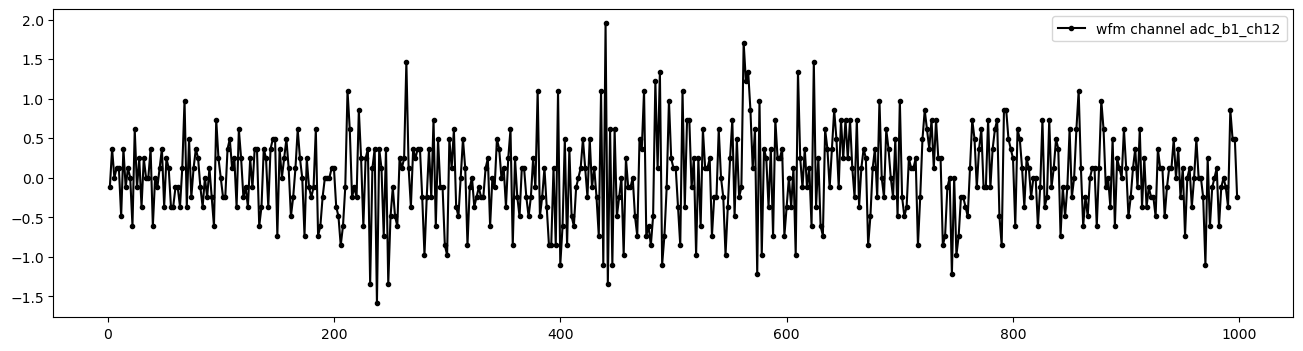

at event  0  chn  adc_b1_ch12  sum results:  3.9064884331319067


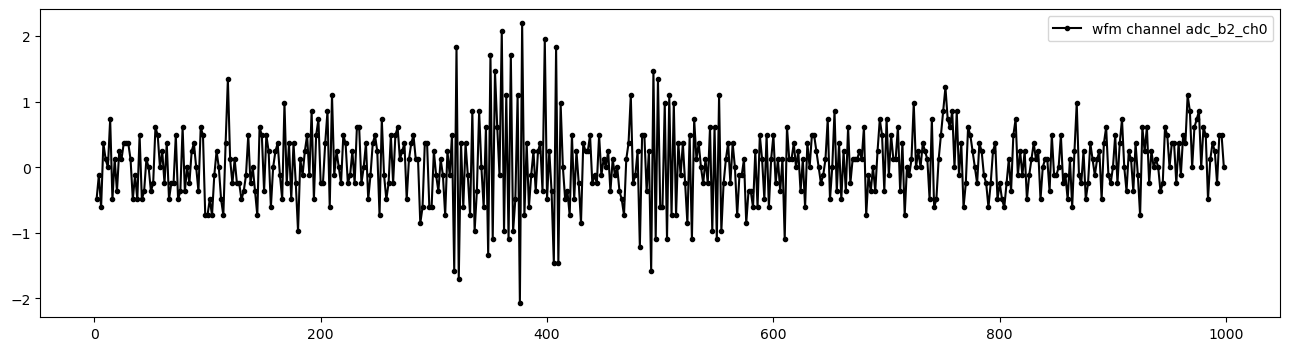

at event  0  chn  adc_b2_ch0  sum results:  18.677897820911923


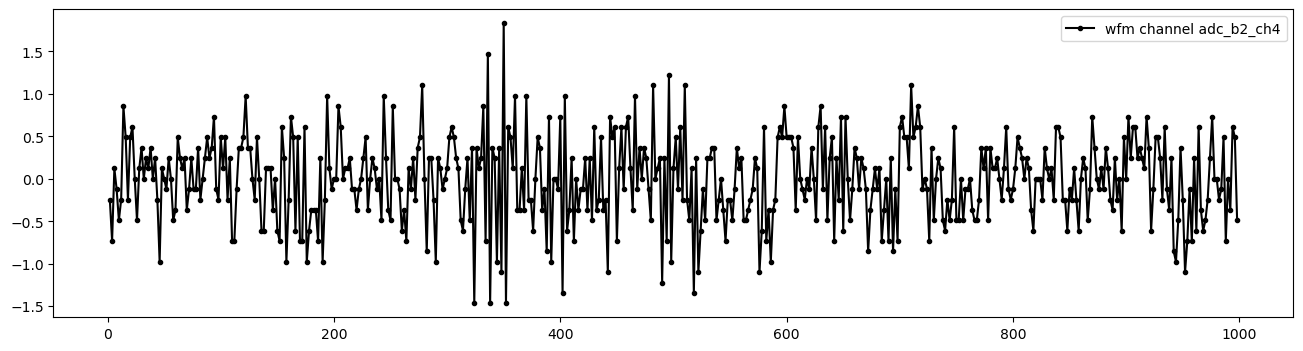

at event  0  chn  adc_b2_ch4  sum results:  -4.15064396020265


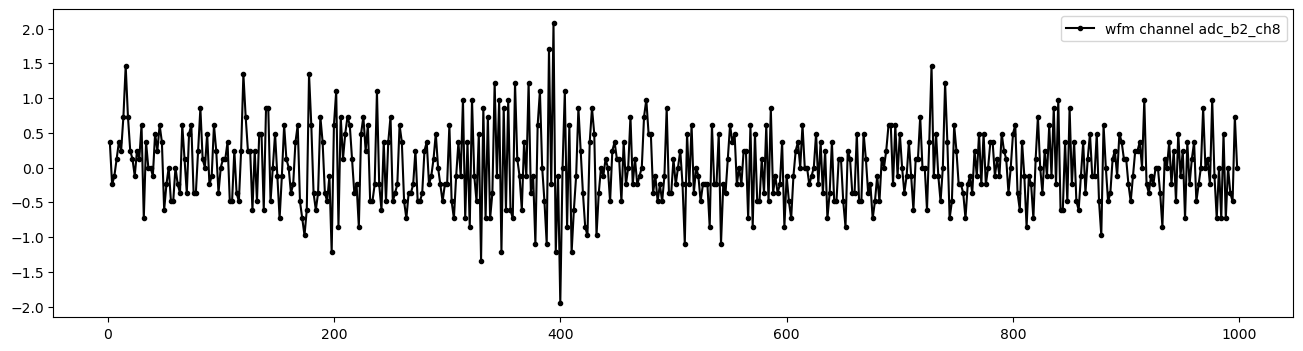

at event  0  chn  adc_b2_ch8  sum results:  -1.9532442165659498


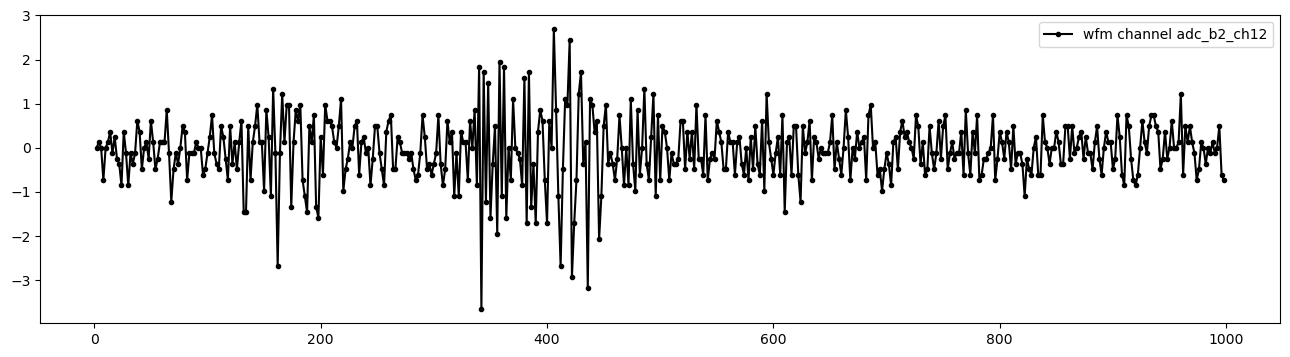

at event  0  chn  adc_b2_ch12  sum results:  -28.07788561313557


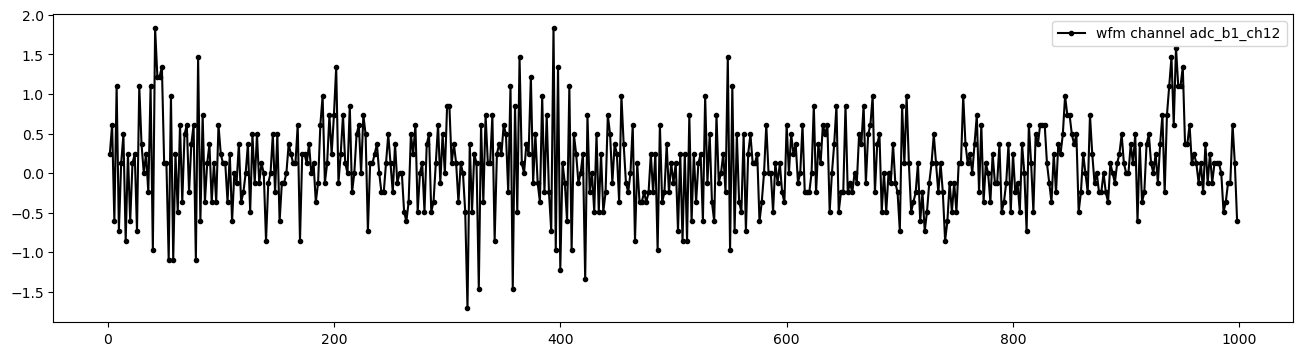

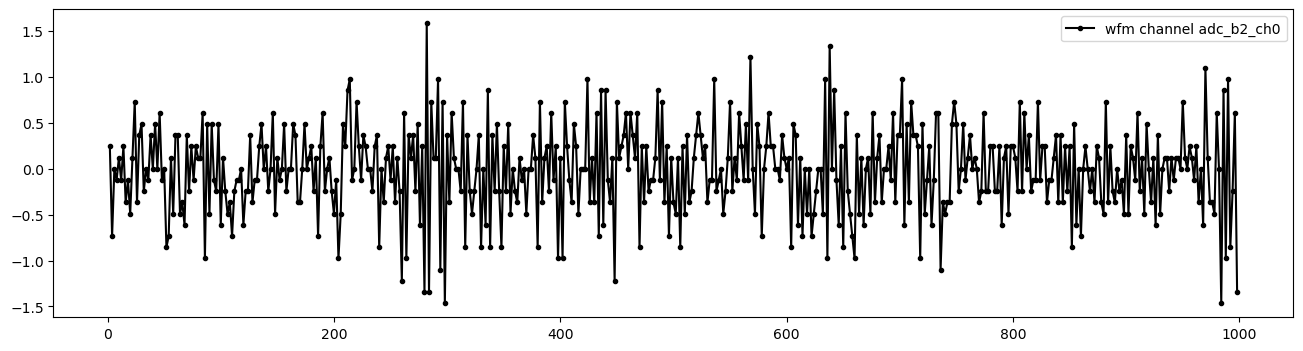

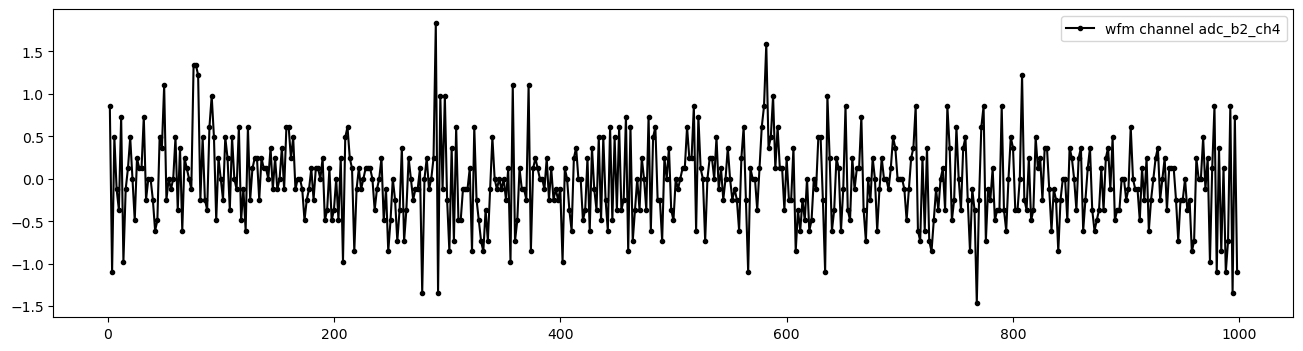

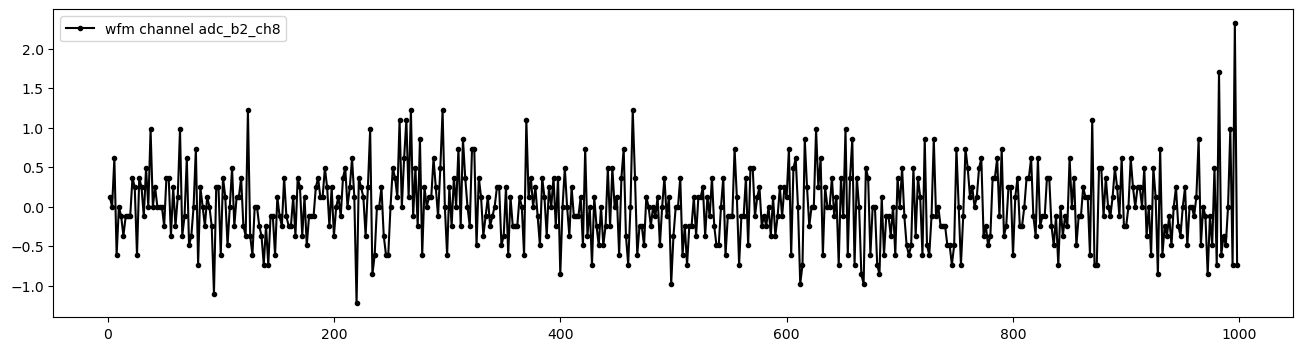

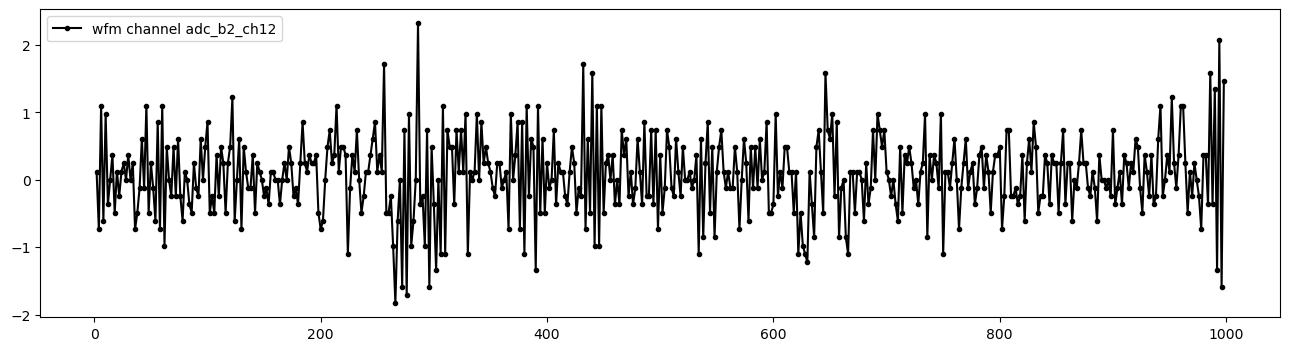

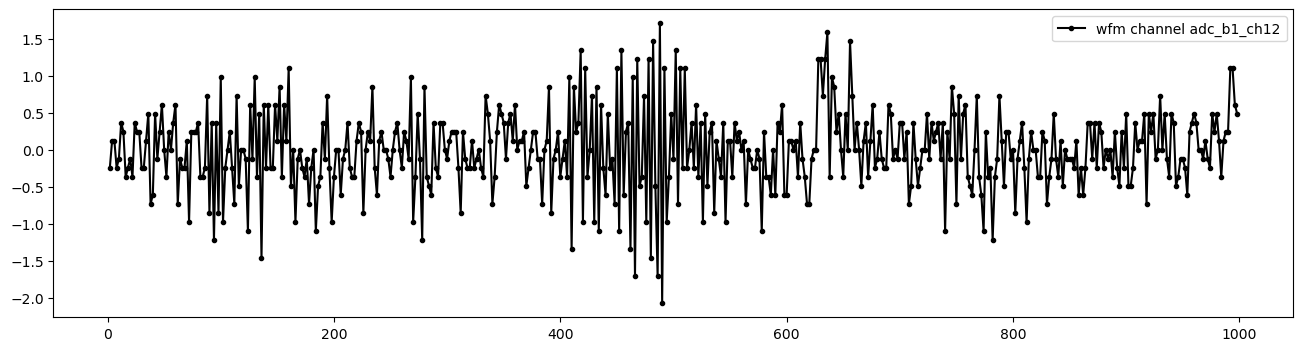

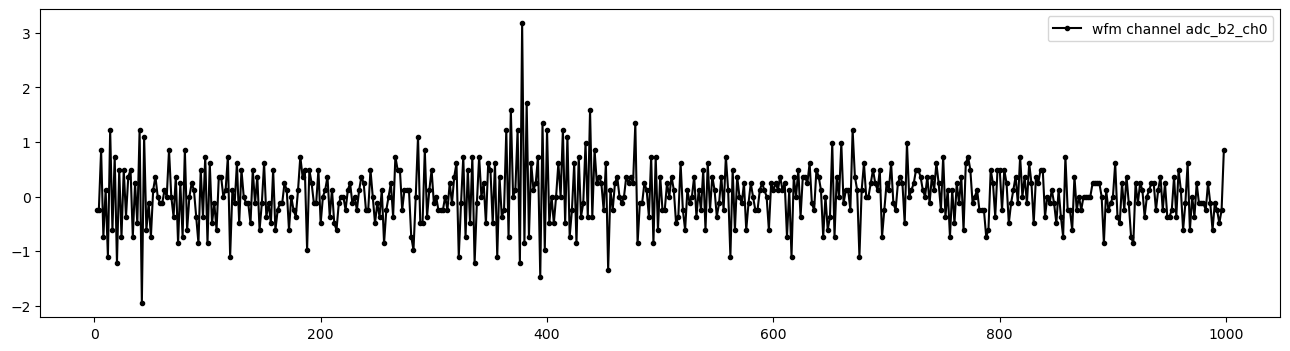

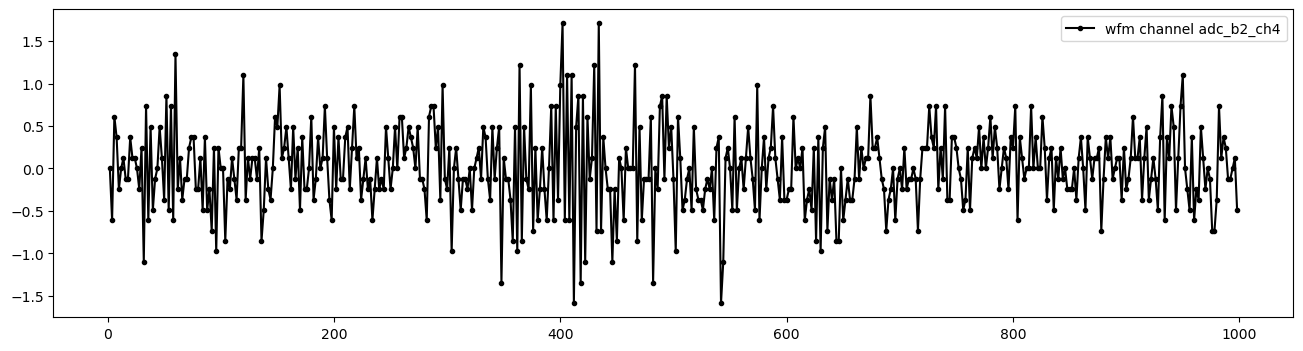

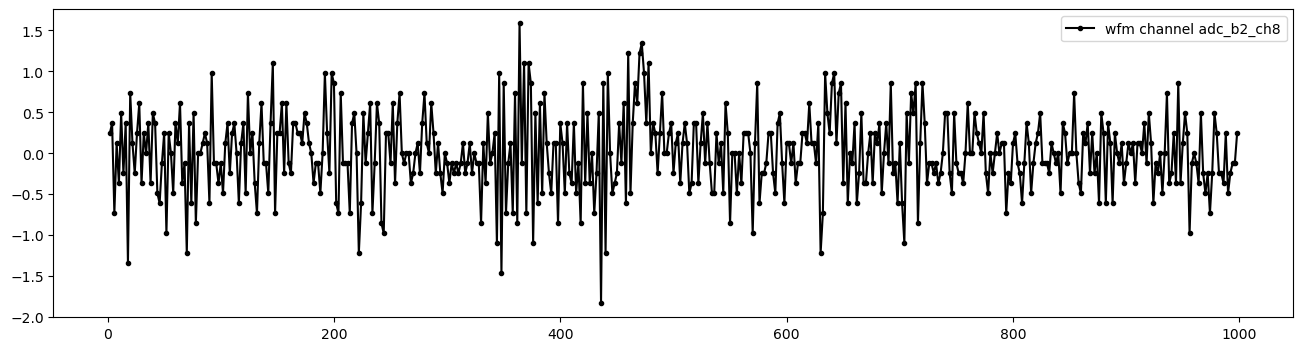

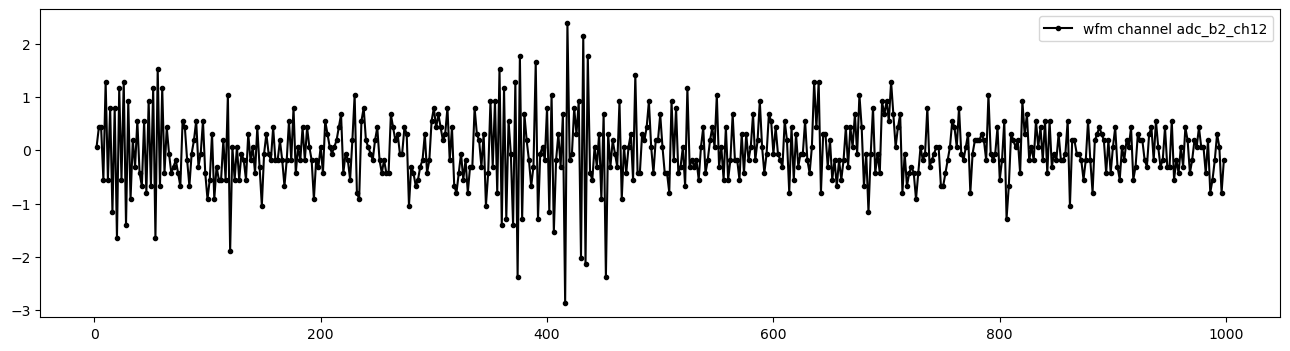

at event  100  chn  adc_b1_ch12  sum results:  -11.597387535860346
at event  100  chn  adc_b2_ch0  sum results:  29.420741012024656
at event  100  chn  adc_b2_ch4  sum results:  10.132454373435877
at event  100  chn  adc_b2_ch8  sum results:  -18.311664530305805
at event  100  chn  adc_b2_ch12  sum results:  -19.288286638588776
at event  200  chn  adc_b1_ch12  sum results:  52.73759384728072
at event  200  chn  adc_b2_ch0  sum results:  -10.25453213697125
at event  200  chn  adc_b2_ch4  sum results:  -18.433742293841174
at event  200  chn  adc_b2_ch8  sum results:  -6.3480437038393465
at event  200  chn  adc_b2_ch12  sum results:  -6.714276994445463
at event  300  chn  adc_b1_ch12  sum results:  2.1973997436366957
at event  300  chn  adc_b2_ch0  sum results:  31.129829701519867
at event  300  chn  adc_b2_ch4  sum results:  -24.537630470609777
at event  300  chn  adc_b2_ch8  sum results:  3.784410669596533
at event  300  chn  adc_b2_ch12  sum results:  25.025941524751268
at event  400  

In [27]:
event_start=0
nfile=4
nevent = 10000*nfile
nevent_perfile = 10000
nsample = 1
y_data_all = np.zeros((36,(event_start+nevent)*nsample))
adev = np.zeros(32)

for ifile in range(nfile):
    fpath='/home/guang/work/bnl1t/drop/drop_jan26_24_pull/data_30ton/light_leak_test_light_on_240708T1706_{}.root'.format(ifile)
    dp = EventDisplay(fpath, '/home/guang/work/bnl1t/drop/drop_jan26_24_pull/drop/yaml/config_30t.yaml')
    min_id, max_id = dp.get_bound_id()
    print ('doing file ',ifile,' min and max ids are ',min_id, ' ',max_id)
    
    #for ievt in range(event_start+nevent_perfile*ifile, event_start+nevent_perfile*ifile+nevent_perfile):
    for ievt in range(min_id, max_id):
            #for ievt in range(0, 10000):
            #if ievt%100 == 0:
            #    print ('at event ',ievt)
            #dp.display_waveform(ievt,'b1_ch1', baseline_subtracted=True)
            #wfm = dp.get_all_waveform(ievt)
        wfm = dp.get_all_waveform(ievt)
        
        t = wfm.time_axis_ns
        #mask = (t>=300) & (t<700)
        mask = (t>0) & (t<1000)
        t2 = wfm.time_axis_ns_b3
        mask2 = (t2>=300) & (t2<700)
        cn = 0
        chg = []
        hchg = []
        atime = []
        #for chn in ['adc_b1_ch0', 'adc_b1_ch1', 'adc_b1_ch2', 'adc_b1_ch3',
        #           'adc_b1_ch4', 'adc_b1_ch5', 'adc_b1_ch6', 'adc_b1_ch7',
        #           'adc_b1_ch8', 'adc_b1_ch9', 'adc_b1_ch10', 'adc_b1_ch11',
        #           'adc_b1_ch12', 'adc_b1_ch13', 'adc_b1_ch14', 'adc_b1_ch15',
        #           'adc_b2_ch0', 'adc_b2_ch1', 'adc_b2_ch2', 'adc_b2_ch3',
        #           'adc_b2_ch4', 'adc_b2_ch5', 'adc_b2_ch6', 'adc_b2_ch7',
        #           'adc_b2_ch8', 'adc_b2_ch9', 'adc_b2_ch10', 'adc_b2_ch11',
        #           'adc_b2_ch12', 'adc_b2_ch13', 'adc_b2_ch14', 'adc_b2_ch15',
        #           'adc_b3_ch0', 'adc_b3_ch1', 'adc_b3_ch2', 'adc_b3_ch3']:
        for chn in ['adc_b1_ch12', 'adc_b2_ch0', 'adc_b2_ch4', 'adc_b2_ch8', 'adc_b2_ch12']:
            if "b3" in chn:
                x_data=t2[mask2]
                yy_data=wfm.amp_mV[chn]
                #plt.plot(x_data, yy_data, color='k', marker='o', label='waveform sample channel {}'.format(chn))
                #plt.legend()
                #plt.figure()
                #plt.show()        
                y_data=yy_data
                #print('b3 integral ',np.sum(y_data))
            else:
                x_data=t[mask]
                y_data=wfm.amp_mV[chn][mask]
            #print(len(x_data),' ',len(y_data))
            if ievt < 3 and cn <32:
                #plt.subplot(8,4,cn+1)
                plt.plot(x_data, y_data, color='k', marker='.', label='wfm channel {}'.format(chn))
                plt.legend()
                #plt.figure()
                plt.show()
                
            #print(y_data)
            if ievt%100 == 0:
                print ('at event ',ievt,' chn ',chn,' sum results: ',np.sum(y_data))
            #for j in range(len(y_data)):
            #for j in range(nsample):
            #if chn == "adc_b1_ch0":
            #y_data_all.append([])
            y_data_all[cn][ievt] = np.sum(y_data)
                #y_data_all[cn][ievt*nsample+j] = y_data[j]
            #print (ievt, ' ',cn)
            #y_data_all[ievt][cn] = np.sum(y_data)
            if "b3" in chn:
                chg.append(np.sum(y_data)/30)
            else:
                chg.append(np.sum(y_data)/30)
            hchg.append(0)
            if (np.max(y_data) > -100):
                fillin = 2*np.argmax(y_data)
                if (cn<16):
                    atime.append(fillin)
                    #print('time index ',fillin)
                elif (cn<32):
                    #print('time index ',fillin)
                    atime.append(fillin+48)
                else:
                    #print('time index ',fillin)
                    atime.append(fillin+48*2)
            else:
                atime.append(600)
                
            for mm in range(len(atime)):
                #if (atime[mm]<90 or atime[mm]>120):
                if (atime[mm]<200 or atime[mm]>400):
                    atime[mm] = 400
            cn += 1
        #for mm in range(32):
        #    adev[mm] += (atime[mm] - np.mean(atime))/nevent
        #plt.savefig('event_waveform_{}.png'.format(ievt))
        #plt.legend()
        #plt.figure()
        #plt.show()
    
        #for looper in range(4):
        #    chg.append(np.mean(chg))
        #    hchg.append(np.mean(chg))
        #print('chg set to be ',chg)
        #display_charge(chg,hchg,atime, ievt, False)
        chg.clear()
        hchg.clear()
    
    #hv_list = [1640, 1500, 1400, 1690, 1310, 1440, 1480, 1560,
    #              1500, 1470, 1440, 1500, 1740, 1520, 1610, 1440,
    #              1480, 1540, 1480, 1540, 1520, 1660, 1610, 1450,
    #              1370, 1610, 1330, 1450, 1340, 1270, 1430, 1780]
    #scc = plt.scatter(hv_list, adev, s=30, c="blue", alpha=1, label="Bottom plane")
    #plt.xlabel("Recommendated HV")
    #plt.ylabel("Time difference to mean time (ns)")
    #pp = np.polyfit(hv_list, adev, 1) 
    #t = np.linspace(1200, 1800, 100)
    #p = np.poly1d(pp)
    #plt.plot(hv_list, adev, 'o', label="Data")
    #plt.plot(t, p(t), '--', label="Fit slo. {}, int. {}".format(round(pp[0],3),round(pp[1],3)))
    #print(pp)
    #plt.legend()
    #plt.show()
    #print(y_data_all)

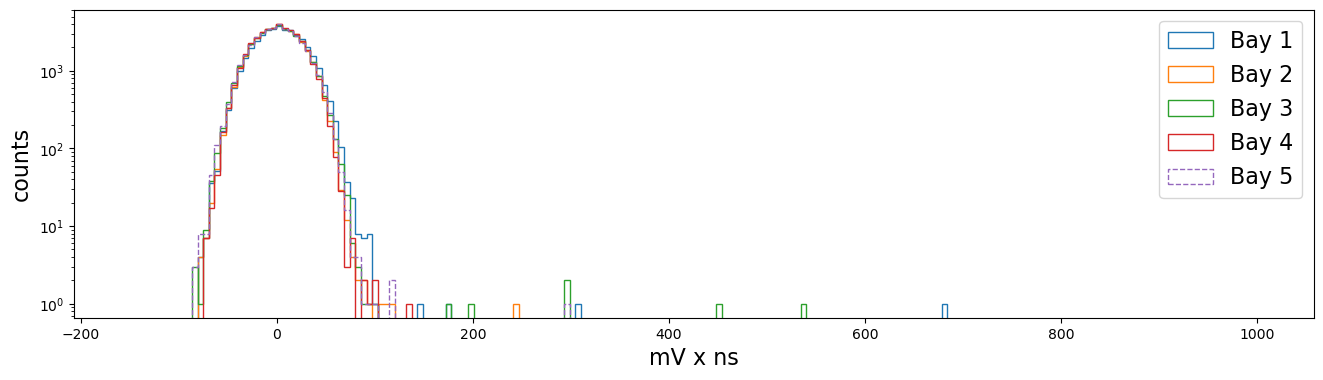

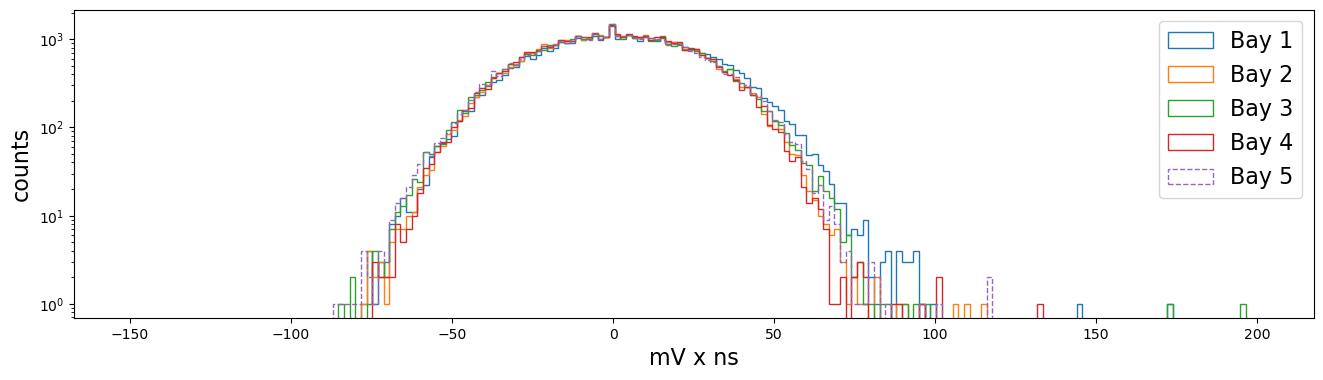

[ 6.36968999e+03 -4.74352447e-02  2.42484059e+01]


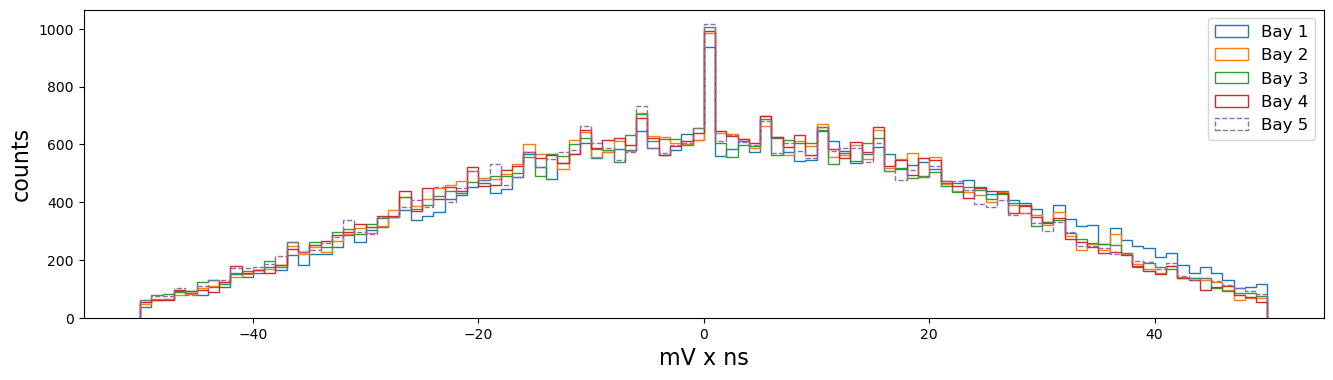

In [39]:
from scipy.optimize import curve_fit

def gaus(x, amp, mu, sigma):
    return amp*np.exp(-(x-mu)**2/(2*sigma**2))


plt.hist(y_data_all[0], 200, range = (-150, 1000), histtype='step', facecolor='green', label='Bay 1'.format(chn))
plt.hist(y_data_all[1], 200, range = (-150, 1000), histtype='step', facecolor='blue', label='Bay 2'.format(chn))
plt.hist(y_data_all[2], 200, range = (-150, 1000), histtype='step', facecolor='red', label='Bay 3'.format(chn))
plt.hist(y_data_all[3], 200, range = (-150, 1000), histtype='step', facecolor='grey', label='Bay 4'.format(chn))
plt.hist(y_data_all[4], 200, range = (-150, 1000), histtype='step', facecolor='orange', linestyle= 'dashed',label='Bay 5'.format(chn))
plt.legend(loc="upper right",fontsize = 16)
plt.yscale('log')
plt.xlabel('mV x ns', fontsize = 16)
plt.ylabel('counts', fontsize = 16)
plt.show()

plt.hist(y_data_all[0], 200, range = (-150, 200), histtype='step', facecolor='green', label='Bay 1'.format(chn))
plt.hist(y_data_all[1], 200, range = (-150, 200), histtype='step', facecolor='blue', label='Bay 2'.format(chn))
plt.hist(y_data_all[2], 200, range = (-150, 200), histtype='step', facecolor='red', label='Bay 3'.format(chn))
plt.hist(y_data_all[3], 200, range = (-150, 200), histtype='step', facecolor='grey', label='Bay 4'.format(chn))
plt.hist(y_data_all[4], 200, range = (-150, 200), histtype='step', facecolor='orange', linestyle= 'dashed', label='Bay 5'.format(chn))
plt.legend(loc="upper right",fontsize = 16)
plt.yscale('log')
plt.xlabel('mV x ns', fontsize = 16)
plt.ylabel('counts', fontsize = 16)
plt.show()

x = np.linspace(-50,50,100)

n1, bins1, patches1 = plt.hist(y_data_all[0], 100, range = (-150, 200), histtype='step', facecolor='green', label='Bay 1'.format(chn))
n2, bins2, patches2 = plt.hist(y_data_all[1], 100, range = (-150, 200), histtype='step', facecolor='blue', label='Bay 2'.format(chn))
n3, bins3, patches3 = plt.hist(y_data_all[2], 100, range = (-150, 200), histtype='step', facecolor='red', label='Bay 3'.format(chn))
n4, bins4, patches4 = plt.hist(y_data_all[3], 100, range = (-150, 200), histtype='step', facecolor='grey', label='Bay 4'.format(chn))
n5, bins5, patches5 = plt.hist(y_data_all[4], 100, range = (-150, 200), histtype='step', facecolor='orange', linestyle= 'dashed', label='Bay 5'.format(chn))
popt1,pcov1 = curve_fit(gaus, x, n1, p0=(1e2,0,10))
popt2,pcov2 = curve_fit(gaus, x, n2, p0=(1e2,0,10))
popt3,pcov3 = curve_fit(gaus, x, n3, p0=(1e2,0,10))
popt4,pcov4 = curve_fit(gaus, x, n4, p0=(1e2,0,10))
popt5,pcov5 = curve_fit(gaus, x, n5, p0=(1e2,0,10))
y1 = gaus(x, popt1[0], popt1[1], popt1[2])
y2 = gaus(x, popt2[0], popt2[1], popt2[2])
y3 = gaus(x, popt3[0], popt3[1], popt3[2])
y4 = gaus(x, popt4[0], popt4[1], popt4[2])
y5 = gaus(x, popt5[0], popt5[1], popt5[2])
print(popt)
#plt.plot(x,y,color='r', linestyle='dashed', label='fit,\nBay 1 mu={}, sigma={} \nBay 2 mu={}, sigma={},\nBay 3 mu={}, sigma={},\nBay 4 mu={}, sigma={},\nBay 5 mu={}, sigma={}'.format(round(popt1[1],1),round(popt1[2],1),
#round(popt2[1],1),round(popt2[2],1),
#round(popt3[1],1),round(popt3[2],1),
#round(popt4[1],1),round(popt4[2],1),
#round(popt5[1],1),round(popt5[2],1)) )
plt.legend(loc="upper right",fontsize = 12)
plt.xlabel('mV x ns', fontsize = 16)
plt.ylabel('counts', fontsize = 16)
plt.show()